<a href="https://colab.research.google.com/github/mhlfsb/PET-GOV/blob/main/IA/PET_GOV_RH_IA_IC_Exerc%C3%ADcio_de_Classe_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


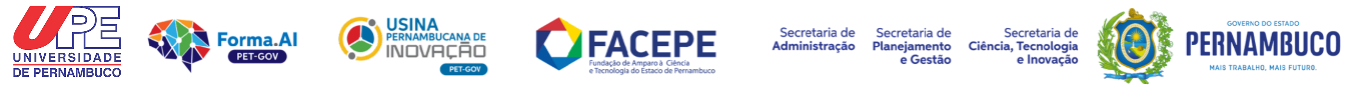

# **Inteligência Artificial, Ciência de dados e Analytics**

Programa de formação de RH-Público em Inteligência Artificial, Ciência de Dados e Analytics (RH.IA-PE)

**Professor Responsável Projeto:** Ph.D. Fernando Buarque de Lima Neto 

**Professor do módulo**: Ph.D. Fernando Buarque de Lima Neto 

Mestrando Gabriel Kopte


---


**Módulo:** 2 - Inteligência Artificial			

**Atividade:** Aula 06 - *Classificadores* Árvores de Decisão

# **Exercício de Classe-3: *Classificadores* Árvores de Decisão**


Conteúdo:
1.   Entendendo o classificador Árvore de Decisão
2.   Métricas de avaliação de classificadores (Matriz de confusão, Precision, Recall, F1)
3.   Ajustando paramêtros



# **1. Entendendo o classificador Árvore de Decisão**

## **1.1 Importação das bibliotecas** <a class="anchor" id="7"></a>


In [1]:
## Este ambiente Python 3 vem com muitas bibliotecas de análise úteis instaladas
## Por exemplo, aqui estão vários pacotes úteis
import numpy as np ## álgebra linear
import pandas as pd ## manipulação e análise de dados
import matplotlib.pyplot as plt ## vizualização de dados
import seaborn as sns ## vizualização de dados estatísticos
from sklearn import datasets #carrega a base de dados 

In [2]:
#Desabilita a messagens de warning
import warnings
warnings.filterwarnings('ignore')

## **1.2 Partes de uma Árvore de Decisão *(Decision Tree)***

Uma árvore de decisão é formada pelas seguintes partes:

* **Decision Nodes (Nós de Decisão)** 
* **Leaf Nodes (Folhas ou Terminais)**

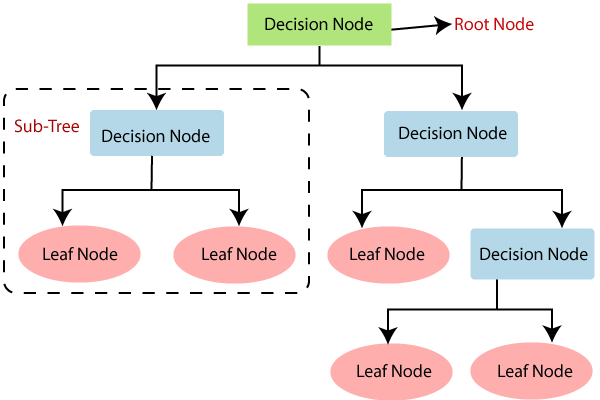

## **1.3 Base de dados** 

Neste exemplo vamos trabalhar com uma base de dados famosa para exemplificar classificadores chamada Iris. *Iris* é um gênero de plantas do qual fazem parte três espécies: *Iris setosa*, *Iris versicolor* e *Iris virginica*.  


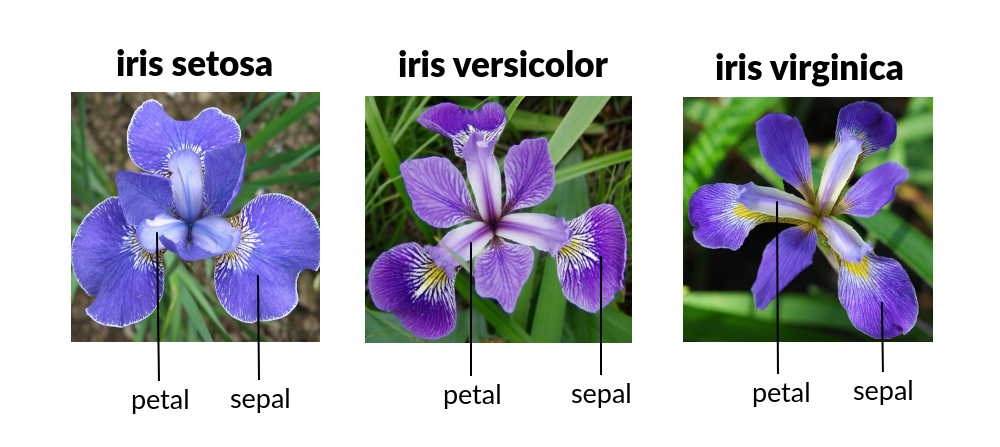

A base de dados utiliza quatro características principais para diferenciar as três espécies analisadas: 

*   Comprimento da pétala *(petal length)*
*   Largura da pétala *(petal width)*
*   Comprimento da sépala *(sepal length)*
*   Largura da sépala *(petal width)*

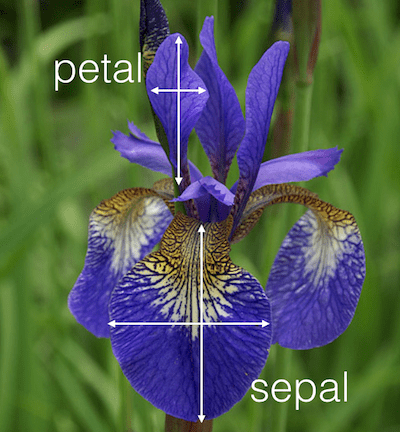

## **1.4 Importar a base de dados**<a class="anchor" id="8"></a>

Vamos trazer a base de dados da biblioteca *sklearn->datasets* da seguinte maneira: 




In [3]:
iris = datasets.load_iris()

In [4]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


Em seguida criamos um Pandas Dataframe com a nossa base de dados.

In [5]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
## visualiza o conjunto de dados
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Vamos modificar a coluna *target* substituindo os códigos (números) 0,1,2 por seus respectivos nomes *setosa*, *versicolor* e *virginica*. 

In [6]:
df['target'] = df['target'].map({0: iris['target_names'][0],
                                          1: iris['target_names'][1],
                                          2: iris['target_names'][2]})
## visualiza o conjunto de dados
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## **1.5 Análise exploratória dos dados**<a class="anchor" id="9"></a>
Vamos explorar a base de dados para obter *insights*.

In [7]:
## visualiza as dimensões da base de dados
df.shape

(150, 5)

#### Resumo das variáveis

Podemos ver que há 150 exemplos (linhas) e 5 variáveis (colunas) na base de dados.
*   Altura da pétala *(petal length)*
*   Largura da pétala *(petal width)*
*   Altura da sépala *(sepal length)*
*   Largura da sépala *(petal width)*
*   Espécie de *Iris*. Esta é nossa variável alvo (**Target**). Aquela que queremos prever com a nossa Árvore de Decisão.



#### Ver resumo da base de dados

In [8]:
#### Ver resumo da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Distribuição de frequência dos valores das variáveis

Agora, verificaremos as contagens de frequência de variáveis categóricas (não numéricas).
Para facilitar a visualização vamos plotar a distribuição de frequência de cada variável (coluna) em um gráfico de barras.

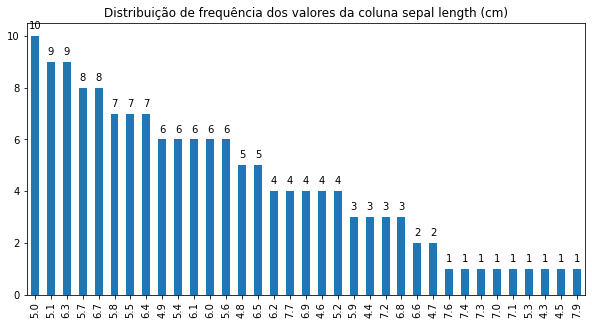

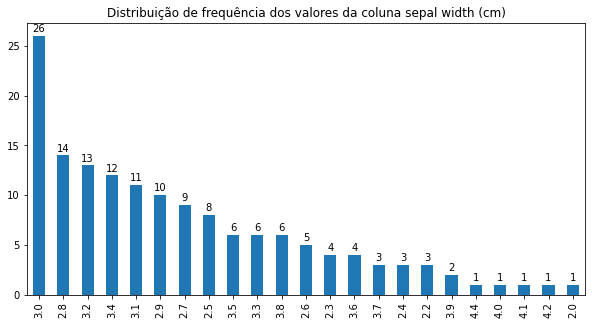

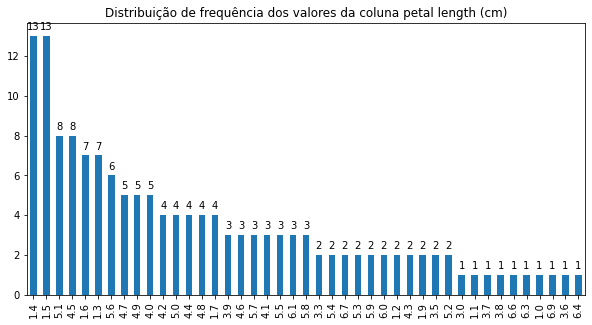

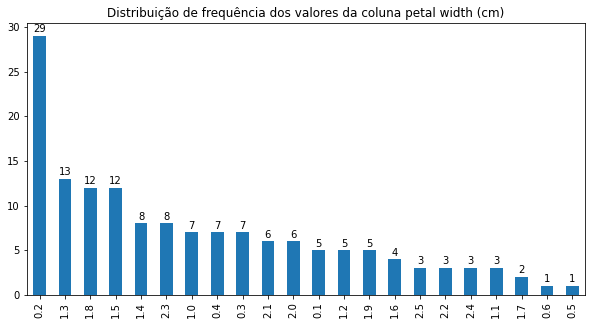

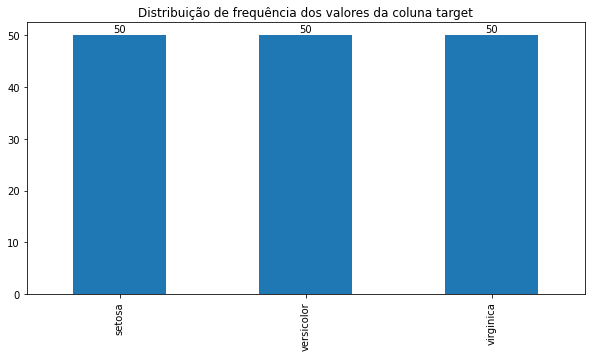

In [9]:
## Loop de impressão de gráfico da coluna
for i in df.columns:
  ax = df[i].value_counts().plot(kind = 'bar',
                                        title = 'Distribuição de frequência dos valores da coluna ' + i,
                                        figsize = (10,5))

  #Inserindo os labels nas barras do gráfico
  rects = ax.patches
  labels = df[i].value_counts()
  for rect, label in zip(rects, labels):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width() / 2, height + 0.2, label,
              ha='center', va='bottom')

  plt.show();

#### Explorando a variável alvo *("target")*

In [10]:
df['target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

#### Valores ausentes nas variáveis

In [11]:
## checa variáveis ausentes
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Nós podemos ver que não há nenhum valor faltando na base de dados. Verificamos a distribuição de frequência dos valores anteriormente. Isso também confirma que não há valores ausentes no conjunto de dados.

## **1.6 Correlação entre as variáveis e a seleção de *features*** <a class="anchor" id="10"></a>

Para mostrar como ávores de decisão funcionam, vamos selecionar duas colunas com pouca correlação entre si.
Para isso vamos plotar uma matriz de correlação de variáveis.

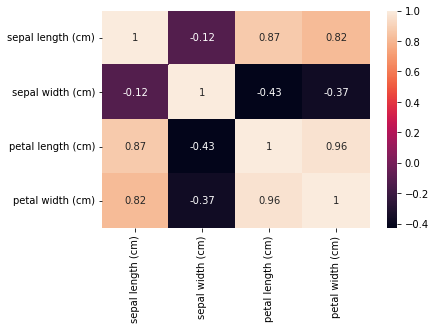

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True)

Como podemos ver no mapa de calor *(heat map)*, as colunas largura de sépala *(sepal width)* e largura de pétala *(petal width)* possuem uma baixa correlação (-0,37) por essa razão vamos selecionar essas duas variáveis para nossa explicação.
Para facilitar a vizualização do processo de criação da árvore, também vamos excluir exemplos com largura de pétalas ou sépalas duplicados


In [13]:
## exclui valores duplicados
df = df.drop_duplicates(subset=['petal width (cm)', 'sepal width (cm)'], keep='first')
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [14]:
features = ['petal width (cm)', 'sepal width (cm)']
X = df[features]
y = df['target']

## **1.7 Divide a base de dados em um conjunto de treinamento e um de teste**<a class="anchor" id="11"></a>

In [15]:
## divide X e y em conjuntos de treinamento e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## verifica a forma de X_train e X_test
X_train.shape, X_test.shape

((68, 2), (30, 2))

## **1.8 Classificador de Árvore de Decisão utilizando *Gini Index* como critério** <a class="anchor" id="13"></a>

In [16]:
## importa DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

## instancia o modelo DecisionTreeClassifier com Gini Index como critério
dt = DecisionTreeClassifier(criterion='gini')

## treina o modelo (fit)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## **1.9 Árvore de Decisão (Passo-a-Passo)**

###### Algumas funções que nos ajudarão a vizualizar o processo. **Não precisamos entendê-las agora. Só vamos usá-las.**

In [17]:
def get_lines(depth, lim, node_n=0):
  '''
  Fetches the lines corresponding to the decision boundaries for the tree
  at given depth
  depth : depth maximum where to fetch the lines
  lim : the frame defined to plot the graph
  node_n : node to fetch the lines
  '''
  seg = np.zeros((2,2))

  if depth==-1:
    return seg
  else:
    f = dt.tree_.feature[node_n]

    lc_node_n = dt.tree_.children_left[node_n]
    rc_node_n = dt.tree_.children_right[node_n]

    if f<0:
      return seg
    else:
      thres = dt.tree_.threshold[node_n]

      seg[f,:] = thres
      seg[1-f,:] = lim[1-f,:]

      if (lc_node_n==-1) and (rc_node_n)==-1:
        return seg
      else:
        l_lim = lim.copy()
        r_lim = lim.copy()

        l_lim[f, 1] = float(thres)
        r_lim[f, 0] = float(thres)

        seg = np.concatenate((seg, get_lines(depth-1, l_lim, lc_node_n)), axis=0) if not np.array_equal(get_lines(depth-1, l_lim, lc_node_n), np.zeros((2,2))) else seg
        seg = np.concatenate((seg, get_lines(depth-1, r_lim, rc_node_n)), axis=0) if not np.array_equal(get_lines(depth-1, r_lim, rc_node_n), np.zeros((2,2))) else seg
        return seg
      
    
def get_decision_boundaries(depth, lim):
  '''
  Wrapper and formatter of the get_lines function
  '''
  segs = get_lines(depth, lim)
  segments = []
  for i in range(0,len(segs),2):
    segments.append(segs[i:i+2,:])
  return segments

def get_pred(feat, depth, node_n=0):
  '''
  Get the predictions of the decision tree at a given depth.
  feat : coordinates (features) of the point
  depth : depth at which the prediction is computed
  node_n : node_n deciding the prediction
  '''
  f = dt.tree_.feature[node_n]
  ## leaf
  if f<0:
    pred = np.argmax(dt.tree_.value[node_n])
    return pred
  elif depth==0:
    pred = np.argmax(dt.tree_.value[node_n])
    return pred
  else:
    if (feat[f]<=dt.tree_.threshold[node_n]):
      lc_node_n = dt.tree_.children_left[node_n]
      return get_pred(feat, depth-1, lc_node_n)
    else:
      rc_node_n = dt.tree_.children_right[node_n]
      return get_pred(feat, depth-1, rc_node_n)

def plot_decision(depth, boundaries=True):
  
  plt.style.use('seaborn-white')

  labels = iris['target_names']
  plot_colors = 'ryb'
  plot_step = 0.02

  ## We define a grid of points from which we will make predictions
  x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
  y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  lim = np.array([[x_min, x_max-0.02],[y_min,y_max-0.05]])

  ## Plot the background color which depicts the decision of the tree
  Z = []
  for feat in np.c_[xx.ravel(), yy.ravel()]:
      Z.append(get_pred(feat,depth))
  Z[0]=1
  Z = np.array(Z).reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, zorder=0)

  if boundaries:
    ## Plot the boundaries of the decision tree
    segments = get_decision_boundaries(depth, lim)
    for seg in segments:
      plt.plot(seg[0,:], seg[1,:], 'k-')

  ## Plot the training data
  for j, (species, color) in enumerate(zip(labels, plot_colors)):
    idx = y_train.index[y_train==species]
    plt.scatter(X_train.loc[idx][features[0]], X_train.loc[idx][features[1]], c=color, label=labels[j], cmap=plt.cm.RdYlBu, edgecolor='black', s=30, zorder=1)

  legend = plt.legend()
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.title('Decision tree at depth {}'.format(depth))

def plot_final_decision():
  
  plt.style.use('seaborn-white')

  labels = iris['target_names']
  plot_colors = 'ryb'
  plot_step = 0.02

  ## We define a grid of points from which we will make predictions
  x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
  y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  lim = np.array([[x_min, x_max-0.02],[y_min,y_max-0.05]])

  Z = []
  for feat in np.c_[xx.ravel(), yy.ravel()]:
      Z.append(get_pred(feat,tree_depth))
  Z[0]=1
  Z = np.array(Z).reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, zorder=0)

  ## Plot the boundaries of the decision tree
  segments = get_decision_boundaries(tree_depth, lim)
  for seg in segments:
    plt.plot(seg[0,:], seg[1,:], 'k-')


  ## Plot the training and testing data
  for j, (species, color) in enumerate(zip(labels, plot_colors)):

    ## Plotting the training data
    idx = y_train.index[y_train==species]
    plt.scatter(X_train.loc[idx][features[0]], X_train.loc[idx][features[1]], c=color, label=labels[j], cmap=plt.cm.RdYlBu, edgecolor='black', s=30, zorder=1)

    ## Plotting the testing data
    test_idx = y_test.index[y_test==species]
    plt.scatter(X_test.loc[test_idx][features[0]], X_test.loc[test_idx][features[1]], c=color, label=labels[j], marker='x', cmap=plt.cm.RdYlBu, edgecolor='black', s=30, zorder=1)

  legend = plt.legend()
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.title('Final decision tree boundaries with the training (x) and testing points (o)')

  def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_best,
                       feature_names=X.columns,
                       class_names=['setosa','versicolor','virginica'],
                       filled=True)

### **Nó 0**

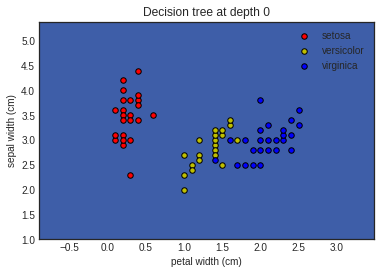

In [18]:
plot_decision(0, False)

Nesse gráfico conseguimos ver o que está acontecendo no nó raiz **(*root node*)** da árvore de decisão:
*   25 *virginica*
*   20 *versicolor*
*   23 *setosa*
* Total 68

A *virginica* é a espécie mais númerosa, então a árvore escolhe *virginica* para ser utilizada no nó raiz **(*root node*)**.


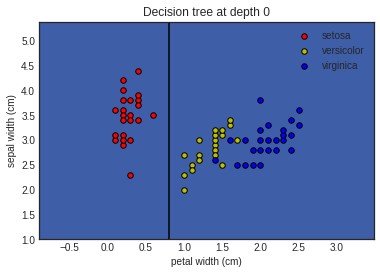

In [19]:
plot_decision(0, True)

Este gráfico é o mesmo anterior só que com a adição da fronteira de decisão ***(decision boundary)***: largura da pétala = 0,8 cm

De onde vem este valor pro ***decision boundary***?
O algoritmo testou todas as possibidades de *largura de pétala* e escolheu a opção com menor índice de Gini (impurezas) para as duas partes da base de dados.


#### Índice de Gini (*Gini index*)

Índice de Gini é uma métrica que mede a probabilidade de um elemento escolhido ao acaso ser classificado incorretamente. Pode ser interpretado como uma medida de homogeneidade de um grupo (*índice Gini* = 0, o grupo é completamente homogêneo).


**Vamos calcular o índice de Gini para o primeiro nó.**

No nó raiz ***(root node)*** todos os pontos estão misturados. O índice de Gini pode ser calculado como:</br></br>
$1 - p_{se}^2 - p_{ve}^2 - p_{vi}^2$ </br></br>
Onde,</br>
*   $p_{se}$ é a probabilidade de escolher uma *setosa*;
*   $p_{ve}$ é a probabilidade de escolher uma *versicolor*;
*   $p_{vi}$ é a probabilidade de escolher uma *virginica*. 

Para o *root node* isso nos dá:</br>
$1- (\frac{23}{68})^2 - (\frac{20}{68})^2 - (\frac{25}{68})^2 = 0.664$

Para o primeiro nó o valor de *gini index* é **0,664**.

No caso do *root node* o algoritmo achou que para todas as larguras de pétalas menores que 0,8 cm o índice de Gini é o seguinte:</br> 
$1 - p_{se}^2 - p_{ve}^2 - p_{vi}^2 = 1 - p_{se}^2 = 1 - (\frac{23}{23})^2=0$</br>

O índice de Gini mede o grau de impureza de um grupo. Com este valor (zero), podemos concluir que para todo caso em que a largura da pétala é menor que 0,8 cm podemos dizer que se trata de uma *Iris setosa*, **sem precisar checar o comprimento da pétala**. 


O índice de Gini para a folha da direita ***(right leaf)*** é:<br/>
$1 - p_{se}^2 - p_{ve}^2 - p_{vi}^2 = 1 - p_{ve}^2 - p_{vi}^2 = 1 - (\frac{20}{45})^2 - (\frac{25}{45})^2 = 0.494$.<br/>

Podemos dizer que *índice de Gini* é próximo de 0.5 o que significa que para largura de pétala maior ou igual a 0,8cm existem aproximadamente metade de *Iris virginica* e metade de *Iris versicolor*.

### **Nó 1**

O processo descrito para o nó 0 continua iterativamente até que a árvore consiga separar todos os exemplos corretamente ou até que encontre alguma condição de parada, como por exemplo uma limitação da profundidade da árvore *(depth)*.

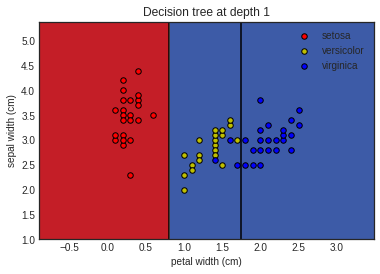

In [20]:
plot_decision(1)

Como do lado esquerdo não é possível diminuir mais a homogeneidade (*Gini index* = 0), o algoritmo procede para o lado direito da fronteira tentando criar dois novos grupos com a maior homogeneidade possível (mínimo *Gini index*). O algoritmo consegue achar novamente um grupo completamente homogêneo de *Iris virginica* quando a largura de pétala é maior do que *1,75 cm*.

### **Nó 2**

Para este nó, o algoritmo escolhe dividir a árvore em *largura de pétala = 1,55* cm criando dois grupos heterogêneos.


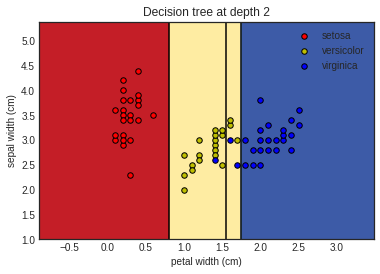

In [21]:
plot_decision(2)

Intuitivamente poderiamos dividir o grupo em largura de pétala igual 1,3 ou 3,1 cm para criar dois um grupo somente com *Iris versicolor*. Porém o outro nó seria muito mais heterogêneo, a ponto de o índice de Gini desse grupo ser maior do que a soma dos índices de Gini dos dois grupos para a divisão anterior.


### **Nó 3**

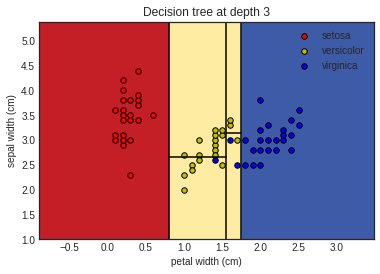

In [22]:
plot_decision(3)

Neste nó a árvore finalmente usa a largura da sépala na classificação. Ela cria duas divisões:
*   largura de pétala **<** 1,55 cm -> Divisão em ***largura da sépala* = 2,65 cm**<br/>
*   largura de pétala **>=** 1,55 cm -> Divisão em ***largura da sépala* = 3,15 cm**<br/>

### **Próximos nós...**

6


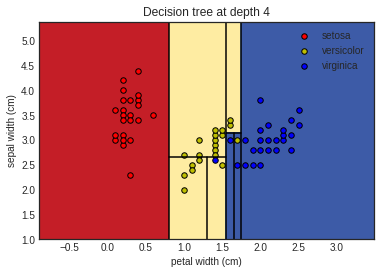

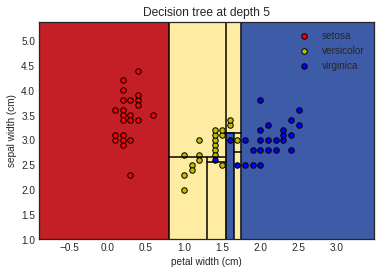

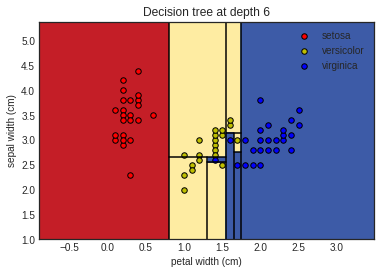

In [23]:
tree_depth = dt.tree_.max_depth
print(tree_depth)
for i in range(4, tree_depth+1):
  plot_decision(i)
  plt.show()

### **Decisão Final**

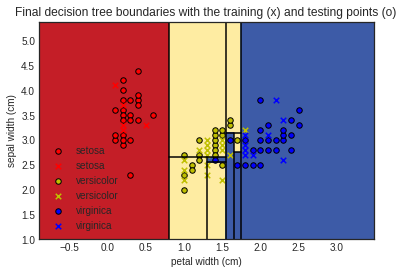

In [24]:
plot_final_decision()

No gráfico acima temos a base de dados de treinamento (x) e a base de dados de teste (o). 

Durante a fase de teste, o algoritmo passa cada ponto pela árvore de decisão escolhendo esquerda (*true*) ou direita (*false*) de acordo com a caracteristica que está sendo testada.

#### Calcula o resultado no conjunto de teste utilizando *gini index*

In [25]:
y_pred = dt.predict(X_test)

#### Verifica a acurácia do modelo

In [26]:
from sklearn.metrics import accuracy_score
print('Acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Acurácia do modelo: 0.9333


#### Visualizando Árvores de Decisão


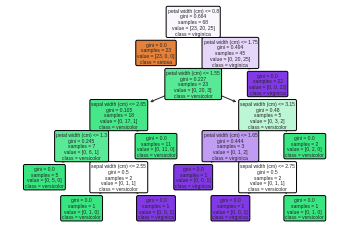

In [27]:
from sklearn import tree
_ = tree.plot_tree(dt,
                   feature_names=features,
                   class_names=iris.target_names,
                   filled=True, rounded=True)

#### **com graphviz**

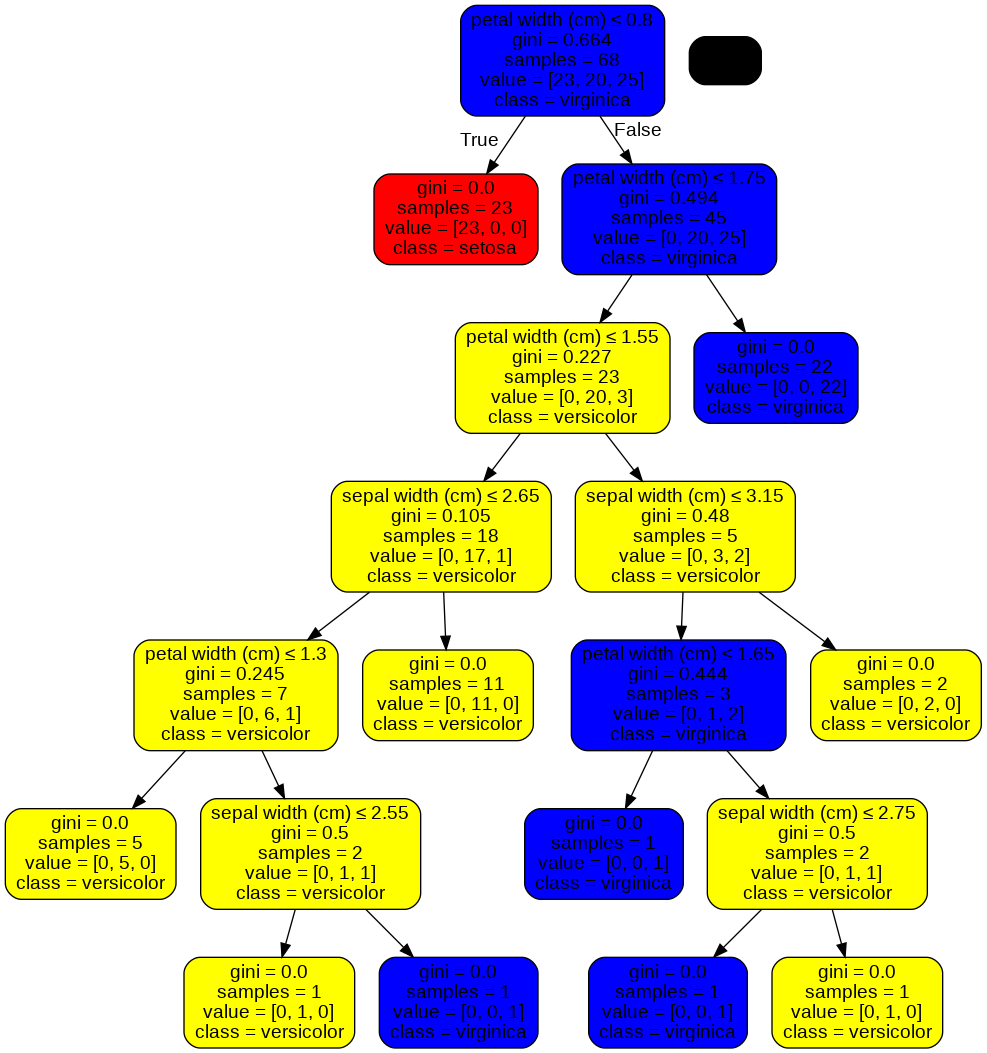

In [28]:
import graphviz 
import pydotplus
from six import StringIO
from IPython.display import Image, display
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=features,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('red', 'yellow', 'blue')
nodes = graph.get_node_list()

for node in nodes:
  if node.get_label():
    values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
    color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2])
    node.set_fillcolor(colors[np.argmax(values)])

graph.write_png('colored_tree.png')



def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

# **2. Métricas de avaliação de modelos**

### **Matriz de Confusão** <a class="anchor" id="15"></a>

Uma matriz de confusão é uma ferramenta utilizada para resumir o desempenho de um algoritmo de classificação. Uma matriz de confusão nos dá uma visão clara do desempenho do modelo de classificação e dos tipos de erros produzidos por ele. O resultado é um resumo das previsões corretas e incorretas separadas por categoria e apresentado de forma tabular.


Quatro tipos de desfechos são possíveis ao avaliar o desempenho de um modelo de classificação. São eles:


**True Positives (TP)** – Verdadeiros Positivos ocorrem quando prevemos que uma observação pertence a uma determinada classe e a observação realmente pertence a essa classe.


**True Negatives (TN)** – Os Verdadeiros Negativos ocorrem quando prevemos que uma observação não pertence a uma determinada classe e a observação realmente não pertence a essa classe.


**Falsos Positivos (FP)** – Falsos Positivos ocorrem quando prevemos que uma observação pertence a uma determinada classe, mas a observação não pertence a essa classe. Esse tipo de erro é chamado de erro **Tipo I.**



**Falsos Negativos (FN)** – Falsos Negativos ocorrem quando prevemos que uma observação não pertence a uma determinada classe, mas a observação pertence a essa classe. Este é um erro muito grave e é chamado de erro **Tipo II.**



Estes quatro desfechos são resumidos em uma matriz de confusão dada abaixo.

In [29]:
#Imprime a Matriz de Confusão e a divide em quatro pedaços
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão\n\n', cm) #Imprime a Matriz de Confusão e a divide em quatro pedaços

Matriz de Confusão

 [[ 5  0  0]
 [ 0 14  2]
 [ 0  0  9]]


Vamos plotar a Matriz de Confusão em forma de Mapa de Calor (*Heat Map*) para facilitar a interpretaçâo.

Text(0.5, 1.0, 'Matriz de Confusão')

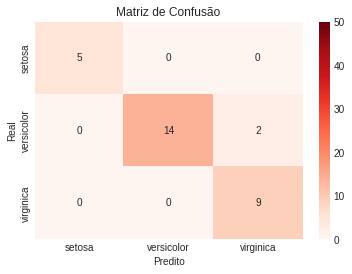

In [30]:
labels = ['setosa','versicolor','virginica']
sns.heatmap(cm, annot=True,fmt='d', vmin=0, vmax=50, cmap='Reds',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')

### **Relatório de classificação** <a class="anchor" id="16"></a>
**Relatório de classificação** é outra forma de avaliar o desempenho do modelo de classificação. Ele exibe as pontuações **precision**, **recall**, **f1** e **support** para o modelo.

* **Acurácia:** indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
* **Precisão:** dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
* **Recall/Revocação/Sensibilidade:** dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
* **F1-Score:** média harmônica entre precisão e recall.

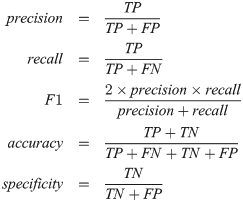

Podemos imprimir um relatório de classificação da seguinte forma:

##### Desempenho no conjunto de teste

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.88      0.93        16
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.96      0.94        30
weighted avg       0.95      0.93      0.93        30



##### Desempenho no conjunto de treinamento

In [32]:
y_pred_train = dt.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        25

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68



Podemos ver que no conjunto de treinamento nosso classificador consegue classificar corretamente todas as amostras. Porém, quando testamos no conjunto de teste vimos que o desempenho não foi tão bom! Isto aconteceu porque ocorreu **overfit** (sobreajuste) durante o treinamento. Isto pode ter acontecido porque criamos uma árvore com excesso de camadas **(depth)** tornando o modelo "complexo demais" para a quantidade e o tipo de dados apresentados no problema.


**Overfit:** é um termo usado para descrever quando um modelo se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.

### **Ajustando parametros da Árvore**

#### Controlando a profundidade da árvore

In [33]:
dt_depth = DecisionTreeClassifier(criterion='gini',max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

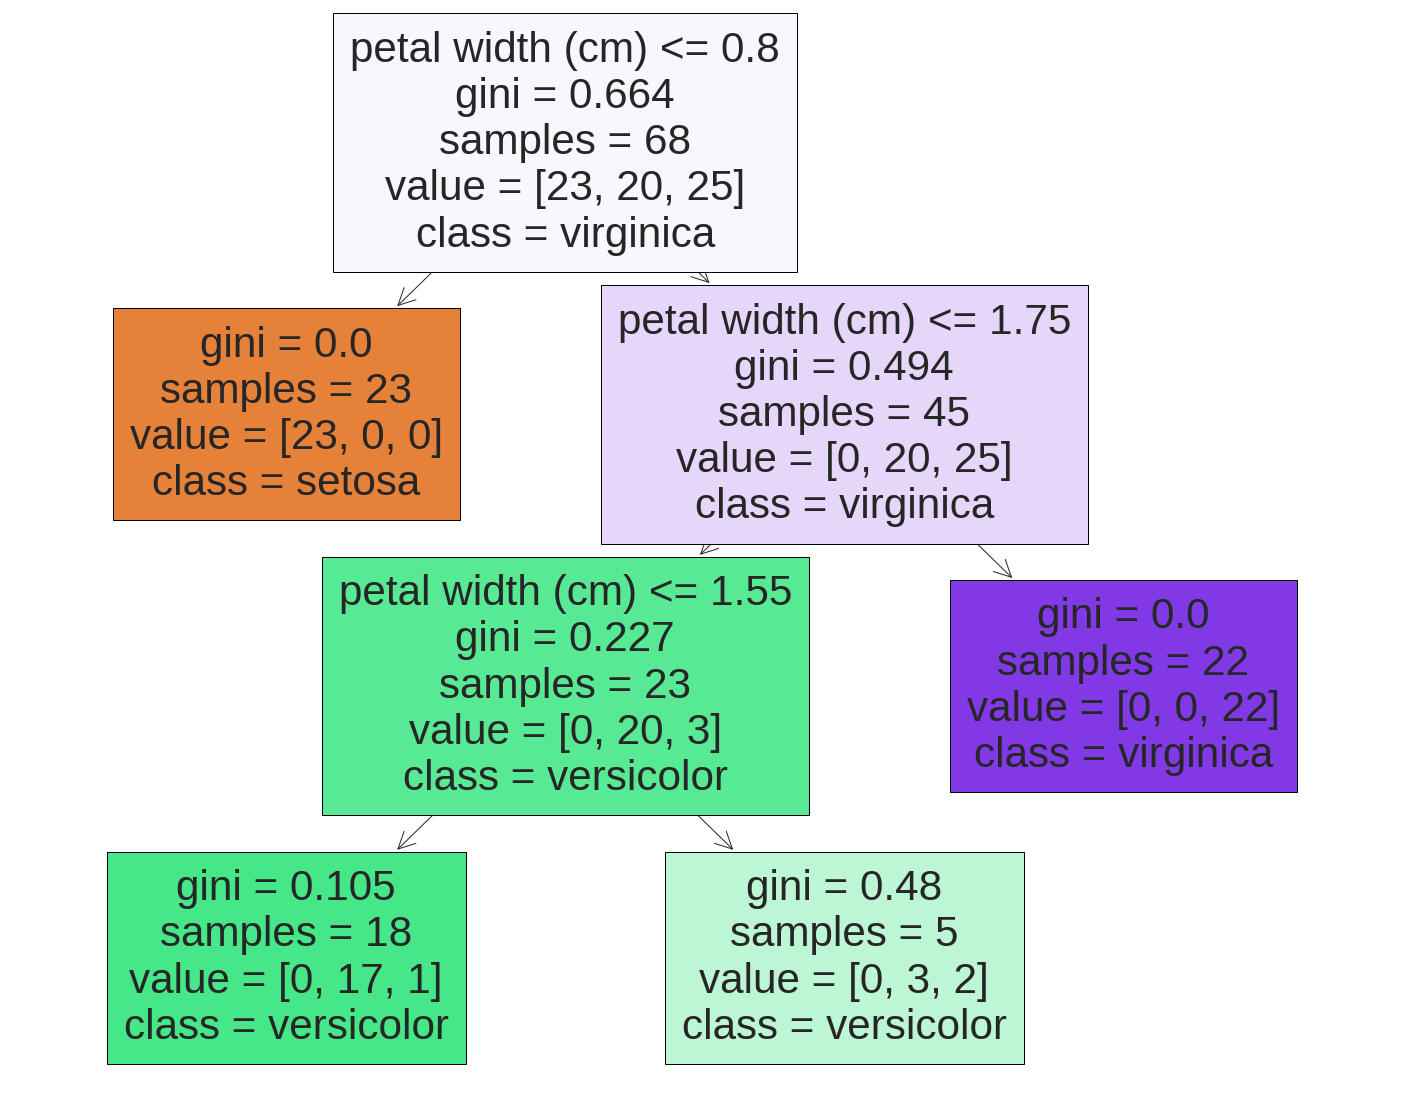

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_depth,
                       feature_names=X.columns,
                       class_names=['setosa','versicolor','virginica'],
                       filled=True)

In [35]:
y_pred_depth = dt_depth.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred_depth))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.88      0.93        16
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.96      0.94        30
weighted avg       0.95      0.93      0.93        30



#### **Ajustando `min_samples_split`**

`min_samples_split` é o número de amostras mínimo necessário para a divisão de um nó.




Um estudo mostrou que o ´min_samples_split` deve ficar entre 1 e 40 para o algoritmo CART, algorimo usado scikit-learn (https://arxiv.org/abs/1812.02207)

In [38]:
dt_min_split = DecisionTreeClassifier(criterion='gini',min_samples_split=25)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=25)

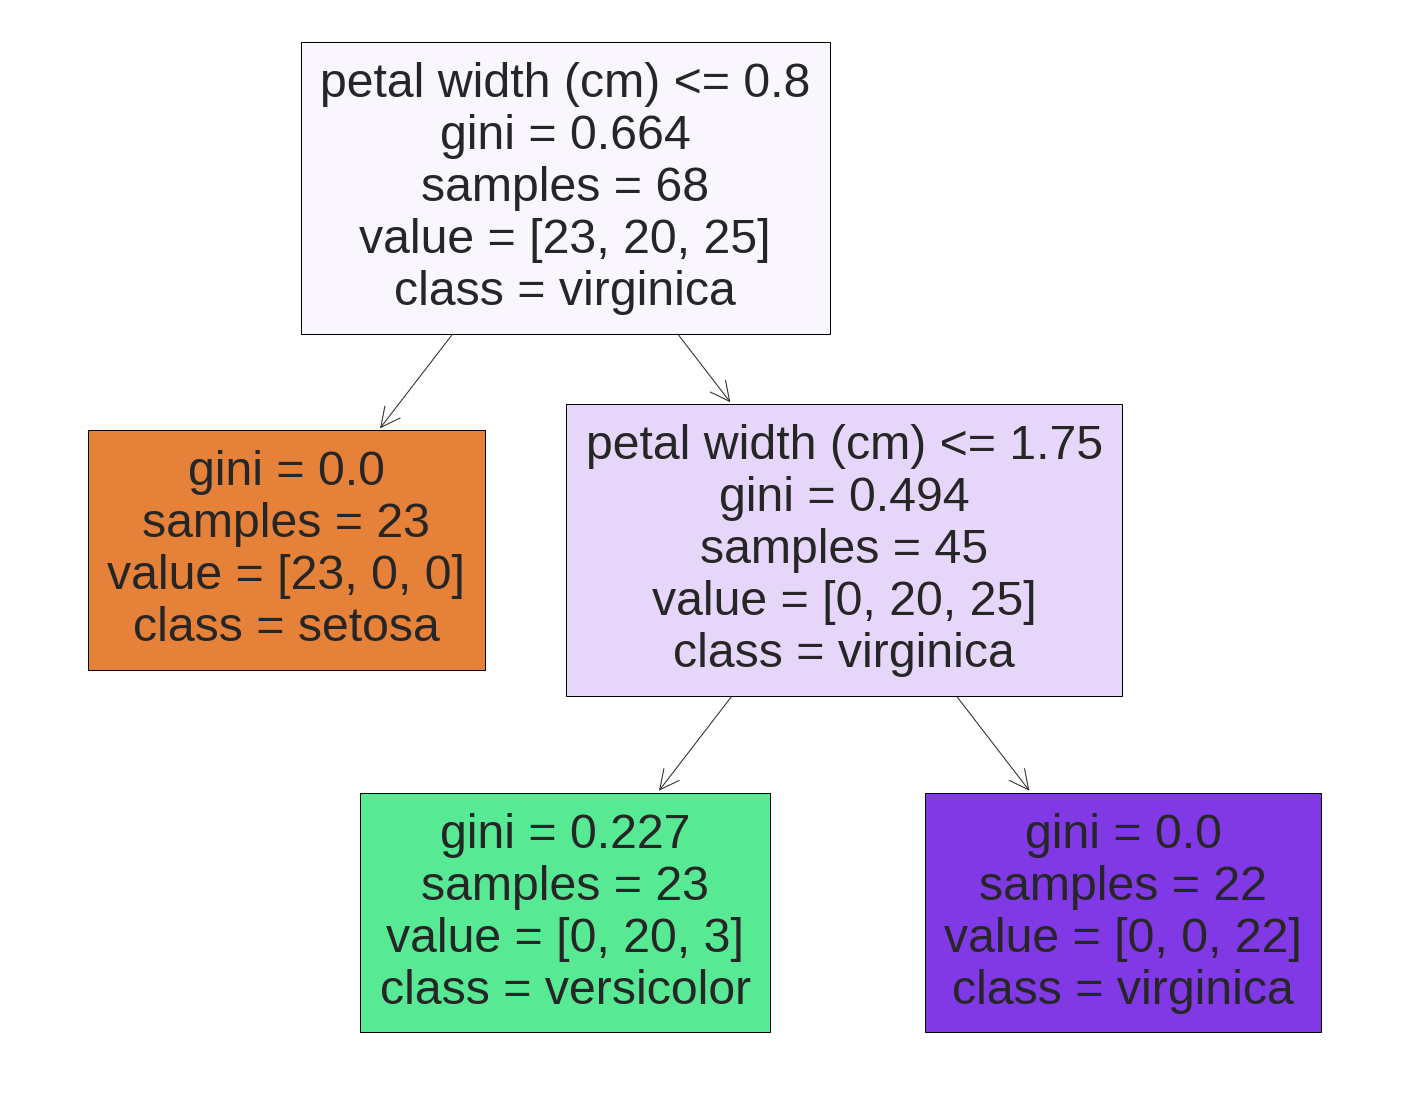

In [39]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_min_split,
                       feature_names=X.columns,
                       class_names=['setosa','versicolor','virginica'],
                       filled=True)

In [40]:
y_pred_min_split = dt_min_split.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred_min_split))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.88      0.93        16
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.96      0.94        30
weighted avg       0.95      0.93      0.93        30



#### **Ajustando `min_samples_leaf`**

É o número mínimo de amostras necessárias para uma terminal (folha/leaf). A divisão de um nó em qualquer profundidade da árvore só será considerado se os terminais tiverem o número mínimo de amostras igual a ´min_samples_leaf´ tanto para a direita quanto para a esquerda. Isto tem um efeito atenuante.

Digamos que especificando `min_samples_split` o resultado sejá um terminal com 1 amostra porém `min_samples_leaf`foi definido como 2. Neste caso `min_samples_split`não vai ser respeitada. `min_samples_leaf` é sempre respeitada não importando o valor de `min_samples_split`.

Se `min_samples_split` e `min_samples_leaves` forem pequenos demais, a árvore vai tender para overfitting, enquanto que se forem grandes demais a capacidade de apredizado da árvore é afetada (underfitting).

In [43]:
dt_min_leaf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=30)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=30)

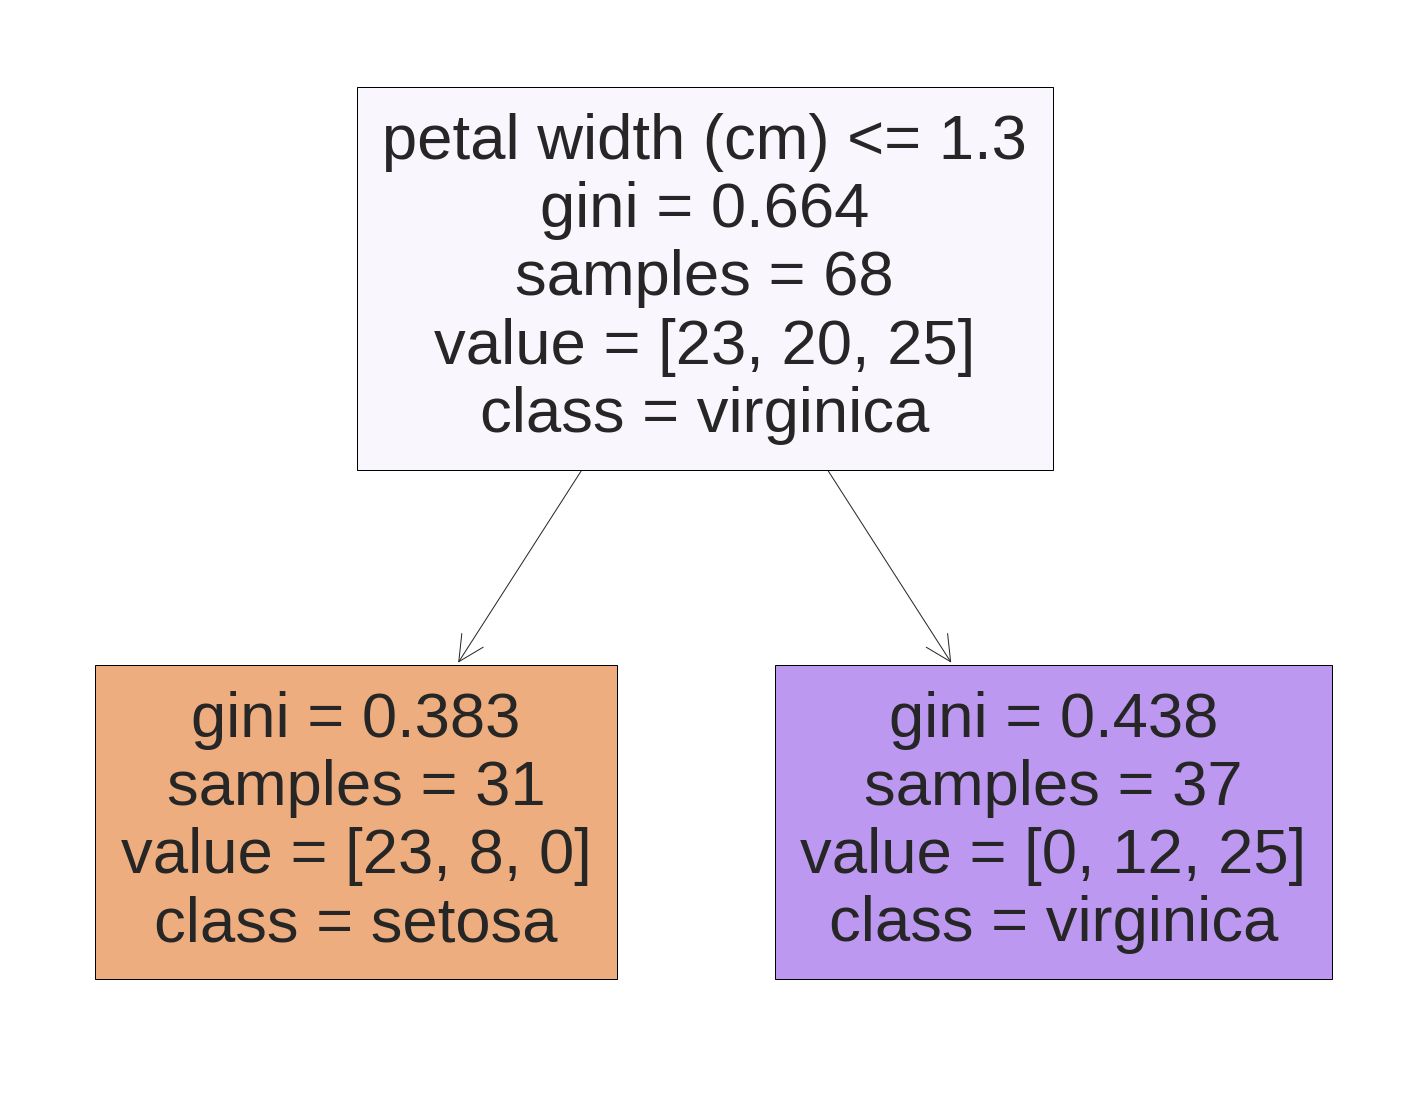

In [44]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_min_leaf,
                       feature_names=X.columns,
                       class_names=['setosa','versicolor','virginica'],
                       filled=True)

In [45]:
y_pred_min_leaf = dt_min_leaf.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred_min_leaf))

              precision    recall  f1-score   support

      setosa       0.33      1.00      0.50         5
  versicolor       0.00      0.00      0.00        16
   virginica       0.60      1.00      0.75         9

    accuracy                           0.47        30
   macro avg       0.31      0.67      0.42        30
weighted avg       0.24      0.47      0.31        30



In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.88      0.93        16
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.96      0.94        30
weighted avg       0.95      0.93      0.93        30



#### **Buscando hiperparâmetros**

In [48]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [49]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "f1_weighted")

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [50]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 483 ms, sys: 48.8 ms, total: 532 ms
Wall time: 4.32 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1_weighted', verbose=1)

In [51]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003628,0.000281,0.006800,0.003455,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.882353,1.000000,0.882353,1.000000,0.941176,0.058824,1
1,0.004612,0.001847,0.007800,0.003269,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.882353,1.000000,0.882353,1.000000,0.941176,0.058824,1
2,0.003481,0.000131,0.011312,0.002566,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.587641,0.584874,0.536199,0.602076,0.577698,0.024834,21
3,0.005229,0.003212,0.003528,0.000229,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.133690,0.184143,0.184143,0.184143,0.171530,0.021847,31
4,0.003265,0.000138,0.008581,0.003084,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.133690,0.184143,0.184143,0.184143,0.171530,0.021847,31


In [52]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003628,0.000281,0.006800,0.003455,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.882353,1.0,0.882353,1.0,0.941176,0.058824,1
1,0.004612,0.001847,0.007800,0.003269,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.882353,1.0,0.882353,1.0,0.941176,0.058824,1
5,0.004425,0.002252,0.003248,0.000147,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.882353,1.0,0.882353,1.0,0.941176,0.058824,1
6,0.003024,0.000229,0.003124,0.000178,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.882353,1.0,0.882353,1.0,0.941176,0.058824,1
10,0.011166,0.008818,0.010718,0.004809,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.882353,1.0,0.882353,1.0,0.941176,0.058824,1


In [53]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

In [54]:
dt_best = grid_search.best_estimator_

In [55]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



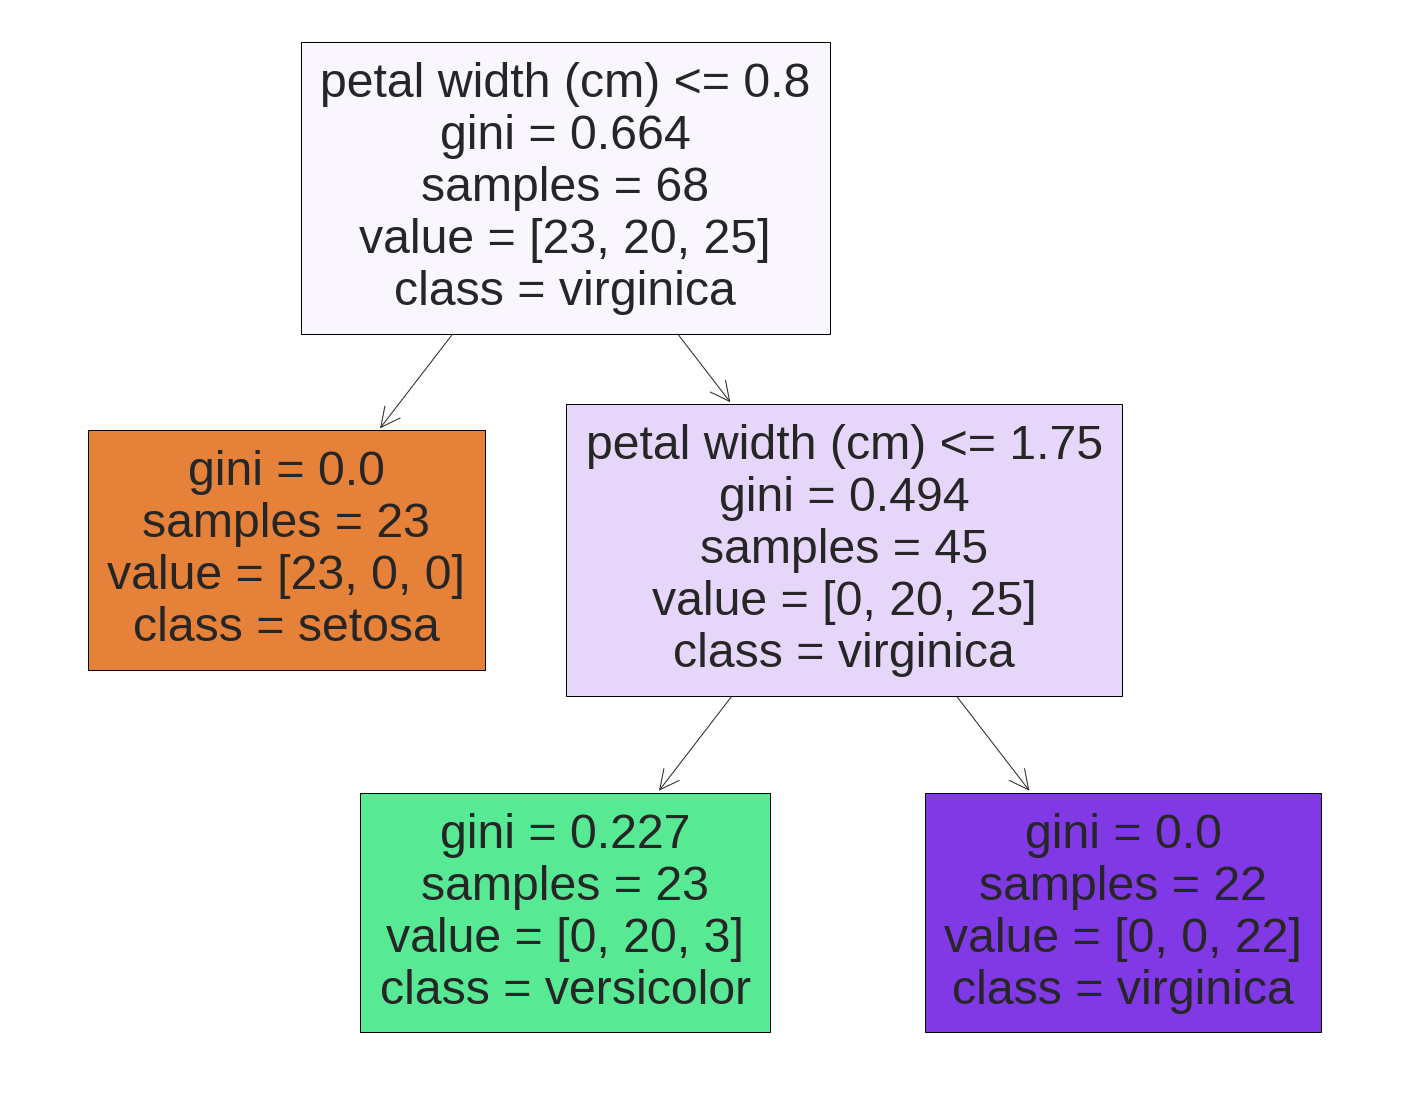

In [56]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_best,
                       feature_names=X.columns,
                       class_names=['setosa','versicolor','virginica'],
                       filled=True)


## **18. Referências** <a class="anchor" id="18"></a>

1. https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579
2. https://vitorborbarodrigues.medium.com/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c
3. https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

